In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument("--file", default = "test.txt")
parser.add_argument("--n", default =  4)
parser.add_argument("--lam", default = 10000)
args = parser.parse_args(args=[])



In [3]:
def Read_file(file_name):
    x = []
    y = []
    file = open(file_name, 'r')
    for line in file:
        line = line.strip('\n')
        nums = line.split(',')
        x.append(float(nums[0]))
        y.append([float(nums[1])])
    return x, y   

In [4]:
def matrix(x, n):
    A = []
    for i in range(len(x)):
        row = []
        for j in range(n-1, -1, -1):
            row.append(x[i]**j)
        A.append(row)
    return A

In [5]:
def matrix_transpose(A):
    A_t = [[0 for i in range(len(A))] for j in range(len(A[0]))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            A_t[j][i] = A[i][j]
    return A_t
            

In [6]:
def matrix_mul(A, B):
    Result = [[0 for i in range(len(B[0]))] for j in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                Result[i][j] += A[i][k] * B[k][j]
    return Result

In [7]:
def matrix_mul_scalar(A, c):
    Result = [[0 for i in range(len(A[0]))] for j in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            Result[i][j] = A[i][j] * c
    return Result

In [8]:
def matrix_add(A, B):
    C = Result = [[0 for i in range(len(A[0]))] for j in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            C[i][j] = A[i][j] + B[i][j]
    return C

In [9]:
def matrix_sub(A, B):
    C = Result = [[0 for i in range(len(A[0]))] for j in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            C[i][j] = A[i][j] - B[i][j]
    return C

In [10]:
def Idendity_matrix(scale, n):
    I = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        I[i][i] = scale
    return I

In [11]:
def Idendity_matrix_for_inverse(scale, n):
    I = [[[0] for i in range(n)] for j in range(n)]
    for i in range(n):
        I[i][i][0] = scale
    return I

In [12]:
def LU(A):
    L = Idendity_matrix(1, len(A))
    U = A
    for i in range(len(A)):
        for j in range(i+1, len(A)):
            L[j][i] = A[j][i] / A[i][i]
            U[j][i] = 0
            for k in range(i+1, len(A)):
                U[j][k] += -L[j][i] * A[i][k]
    return L ,U        

In [13]:
def lower_solve(L, y):
    ans = []
    for i in range(0,len(L)):
        for j in range(i):
            y[i][0] -= L[i][j]*ans[j]
        ans.append(y[i][0])
    return ans

In [14]:
def upper_solve(U, y):
    ans = [0 for i in range(len(U))]
    for i in range(len(U)-1, -1, -1):
        for j in range(len(y)-1, i , -1):
            y[i] -= U[i][j] * ans[j][0]
        ans[i] = [y[i] / U[i][i]]
    return ans

In [15]:
def get_inverse(A):
    L, U = LU(A)
    result = []
    I = Idendity_matrix_for_inverse(1, len(A))
    for i in I:
        tmp = upper_solve(U, lower_solve(L ,i))
        x = []
        for num in tmp:
            x.append(num[0])
        result.append(x)
    return matrix_transpose(result)

In [16]:
def print_matrix(A):
    for row in A:
        print(row,'\n')

In [17]:
def error(A, x, y, lamb = 0):
    pred = matrix_mul(A, x)
    x_t = matrix_transpose(x)
    err = 0
    for i in range(len(y)):
        err += (y[i][0] - pred[i][0]) ** 2
    err += lamb * matrix_mul(x_t, x)[0][0]
    return err

In [18]:
def find_next(x0, A, y):
    A_t = matrix_transpose(A)
    A_tA = matrix_mul(A_t, A)
    hessian = matrix_mul_scalar(A_tA, 2)
    inverse_hessian = get_inverse(hessian)
    nabla = matrix_sub(matrix_mul(hessian, x0), matrix_mul(matrix_mul_scalar(A_t, 2), y))
    x_grad = matrix_mul(inverse_hessian, nabla)
    x1 = matrix_sub(x0, x_grad)
    return x1

In [19]:
def newton(A, y, n):
    result = []
    x_old = [[0] for i in range(n)]
    err = float("inf")
    
    while(1):
        x_new = find_next(x_old, A, y)
        x_delta = matrix_sub(x_new, x_old)
        x_delta = matrix_mul(matrix_transpose(x_delta), x_delta)
        new_error = error(A, x_old, y)    
        if new_error <= err:
            err = new_error
            ans = x_old
            x_old = x_new
        else:
            break
        '''
        if(x_delta[0][0] < 0.001):
            break
        else:
            x_old = x_new
        '''
    return ans
    

In [20]:
def print_function(x, n):
    function = "Fitting line: "
    for i in range(n):
        function += str(x[i][0])
        if n-i-1 != 0:
            function += "X^"+str(n-i-1)
            if(x[i+1][0]>0):
                function += ' +'
            else:
                function += ' '
        else:
            pass
    print(function)

In [21]:
def print_lse(A, x, y):
    print("LSE:")
    print_function(x, args.n)
    print("Total error: ", error(A, x, y, args.lam))
    graph("LSE", A, x, y)

In [22]:
def print_newton(A, x, y):
    print("Newton's Method:")
    print_function(x, args.n)
    print("Total error: ", error(A, x, y))
    graph("Newton", A, x, y)

In [23]:
def graph(name, A, result, y):  
    plt.title(name)
    x, y = Read_file(args.file)
    plt.scatter(x, y, c = 'red')    
    func_x = np.array(range(-6, 7)) 
    func_y = sum(result[i][0]* func_x**(args.n-i-1) for i in range(len(result)))
    plt.plot(func_x, func_y)
    '''
    x1, x2, y1, y2 = plt.axis()
    plt.axis([x1, x2, -5, 150])
    '''
    plt.show()

LSE:
Fitting line: 0.17706464362192412X^3 +0.853383523699459X^2 +0.02410443568869497X^1 +0.04774151195752844
Total error:  26908.427118299474


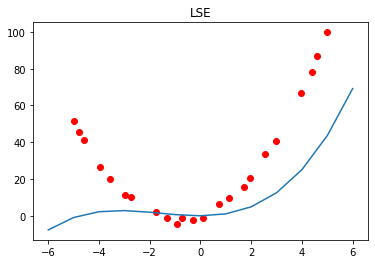

Newton's Method:
Fitting line: -0.0024817021513977022X^3 +3.023564056636268X^2 +4.950148778125887X^1 -0.22931017923939123
Total error:  26.494565460031772


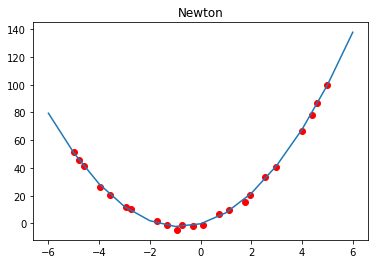

In [24]:
if __name__ == "__main__":
    # Read data
    x, y = Read_file(args.file)
    # basic matrix
    A = matrix(x, args.n)
    A_t = matrix_transpose(A)
    A_tA = matrix_mul(A_t, A)
    
    # LSE
    lambda_I = Idendity_matrix(args.lam, len(A_tA))
    A_tAI = matrix_add(A_tA, lambda_I)
    L, U = LU(A_tAI)
    
    A_ty = matrix_mul(A_t, y)
      
    x = upper_solve(U, lower_solve(L ,A_ty))
    '''
    inv = get_inverse(A_tAI)
    x = matrix_mul(matrix_mul(inv, A_t), y)
    '''
    print_lse(A ,x, y)
    
    #Newton
    x = newton(A, y, args.n)
    print_newton(A, x, y)
